# EDA-Project


### Анализ сделан для валютного рынка.

**Вопросы:**

    1. Связаны ли валюты между собой? (чтобы более точно предсказать рынок)
    2. Какую тенденцию они имеют? (стоит ли покупать / продать)
    3. Какая максимальна и минимальная сумма? (на что можно расчитывать)
    4. Какое среднее значение каждой валюты? (что более вероятно)
    5. Связана ли информация о валютах к определенному дню недели? (какой день нужно мониторить более пристально)

In [1]:
# Импорт нужных пакетов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_columns',50)

In [2]:
# Чтение данных 
or_rates=pd.read_csv('foreign_exchange_rates.csv')
rates=or_rates.copy()
rates.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,1128,9.4015,6.126,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.457,6.085,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,1135,9.535,6.07,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,1146.5,9.567,6.08,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,1138,9.52,6.057,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [3]:
# Удаление ненужного столбца и общее описание
rates.drop('Unnamed: 0',axis=1,inplace=True)
rates.describe()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
count,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217
unique,5217,2959,2704,2681,2303,3880,3147,2711,893,1998,3423,4249,3759,2927,4462,2848,1788,4511,4574,1781,3190,714,1380
top,2000-01-03,ND,ND,ND,ND,ND,ND,8.2765,ND,ND,ND,ND,ND,ND,ND,ND,3.8,ND,ND,ND,ND,ND,ND
freq,1,198,198,198,198,198,198,208,198,199,198,198,198,198,198,198,1376,198,198,198,198,201,198


In [4]:
# Общая информация о данных
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Time Serie                                 5217 non-null   object
 1   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object
 2   EURO AREA - EURO/US$                       5217 non-null   object
 3   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object
 4   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object
 5   BRAZIL - REAL/US$                          5217 non-null   object
 6   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object
 7   CHINA - YUAN/US$                           5217 non-null   object
 8   HONG KONG - HONG KONG DOLLAR/US$           5217 non-null   object
 9   INDIA - INDIAN RUPEE/US$                   5217 non-null   object
 10  KOREA - WON/US$                     

In [5]:
# Добавление столбца с днями недели
rates['Time Serie'] = pd.to_datetime(rates['Time Serie'])
rates['Weekday'] = pd.to_datetime(rates['Time Serie']).dt.day_name()
columns=rates.columns.tolist()
columns=columns[-1:] + columns[:-1]
rates = rates[columns]
rates.tail()

,Weekday,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
5212,Wednesday,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,Thursday,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,71.28,1161.18,18.944,14.132,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,Friday,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,1160.87,18.819,14.025,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,Monday,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,71.3,1155.75,18.863,14.056,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94
5216,Tuesday,2019-12-31,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,71.36,1155.46,18.86,13.973,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75


In [6]:
# Чистка данных
rates=rates.replace('ND',np.nan)
print('Total rows =', len(rates.index))

# Резервная копия строк без данных 
nan_rates = rates[rates.isna().any(axis=1)]
print('NaN rows=', len(nan_rates.index))

# Удалила NaN, чтобы получить более точные данные, так как количество NaN не критично.
rates = rates.dropna()
print('Clean data rows =', len(rates.index),'\n')

# Изменение типов данных с object на float
for col in columns:
    if col!='Weekday' and col!='Time Serie':
        rates[col]=rates[col].astype(float)
        
rates.info()

Total rows = 5217
NaN rows= 202
Clean data rows = 5015 

<class 'pandas.core.frame.DataFrame'>
Index: 5015 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Weekday                                    5015 non-null   object        
 1   Time Serie                                 5015 non-null   datetime64[ns]
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5015 non-null   float64       
 3   EURO AREA - EURO/US$                       5015 non-null   float64       
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5015 non-null   float64       
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5015 non-null   float64       
 6   BRAZIL - REAL/US$                          5015 non-null   float64       
 7   CANADA - CANADIAN DOLLAR/US$               5015 non-null   float64       
 8   CHINA - YUAN/US$                           501

In [7]:
# Более точное описание данных
rates.describe()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
count,5015,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000
mean,2009-12-25 16:30:54.915254272,1.332160,0.844014,1.543820,0.640466,2.548483,1.230503,7.200544,7.782643,52.726249,1125.552552,13.195141,9.422128,1.480412,6.286814,106.589230,3.651129,7.076004,7.899849,119.116291,1.150475,31.764830,35.522574
min,2000-01-03 00:00:00,0.906900,0.624600,1.134600,0.473800,1.537500,0.916800,6.040200,7.708500,38.480000,903.200000,8.946000,5.615000,1.200700,4.660500,75.720000,2.937000,4.946700,5.834600,72.300000,0.729600,28.500000,28.600000
25%,2004-12-28 12:00:00,1.115200,0.751000,1.323800,0.587500,1.945650,1.055850,6.475550,7.756400,45.250000,1067.570000,10.801750,7.113750,1.342900,5.593550,100.080000,3.290500,5.996600,6.852700,100.380000,0.966800,30.350000,31.780000
50%,2009-12-22 00:00:00,1.311300,0.815600,1.442600,0.636500,2.329100,1.237100,6.860000,7.780600,48.100000,1127.790000,12.462500,8.167100,1.408400,6.072500,109.020000,3.800000,6.785000,7.748300,112.300000,1.040300,31.730000,34.010000
75%,2014-12-22 12:00:00,1.430400,0.900150,1.591200,0.692400,3.130000,1.335700,8.276500,7.799800,62.440000,1180.000000,14.745000,11.626250,1.679350,6.714850,116.815000,3.800000,8.279100,8.744300,132.650000,1.269150,32.980000,39.410000
max,2019-12-31 00:00:00,2.071300,1.209200,2.551000,0.828700,4.259400,1.612800,8.280000,7.849900,74.330000,1570.100000,21.891000,16.884500,1.854000,9.005000,134.770000,4.496000,9.589000,11.027000,182.800000,1.825000,35.210000,45.820000
std,NaN,0.269974,0.126826,0.337414,0.082562,0.724234,0.182136,0.820413,0.027551,9.678708,103.406953,3.318176,2.831540,0.189003,0.943430,13.211723,0.378635,1.226730,1.201841,25.352131,0.249145,1.671172,4.563843


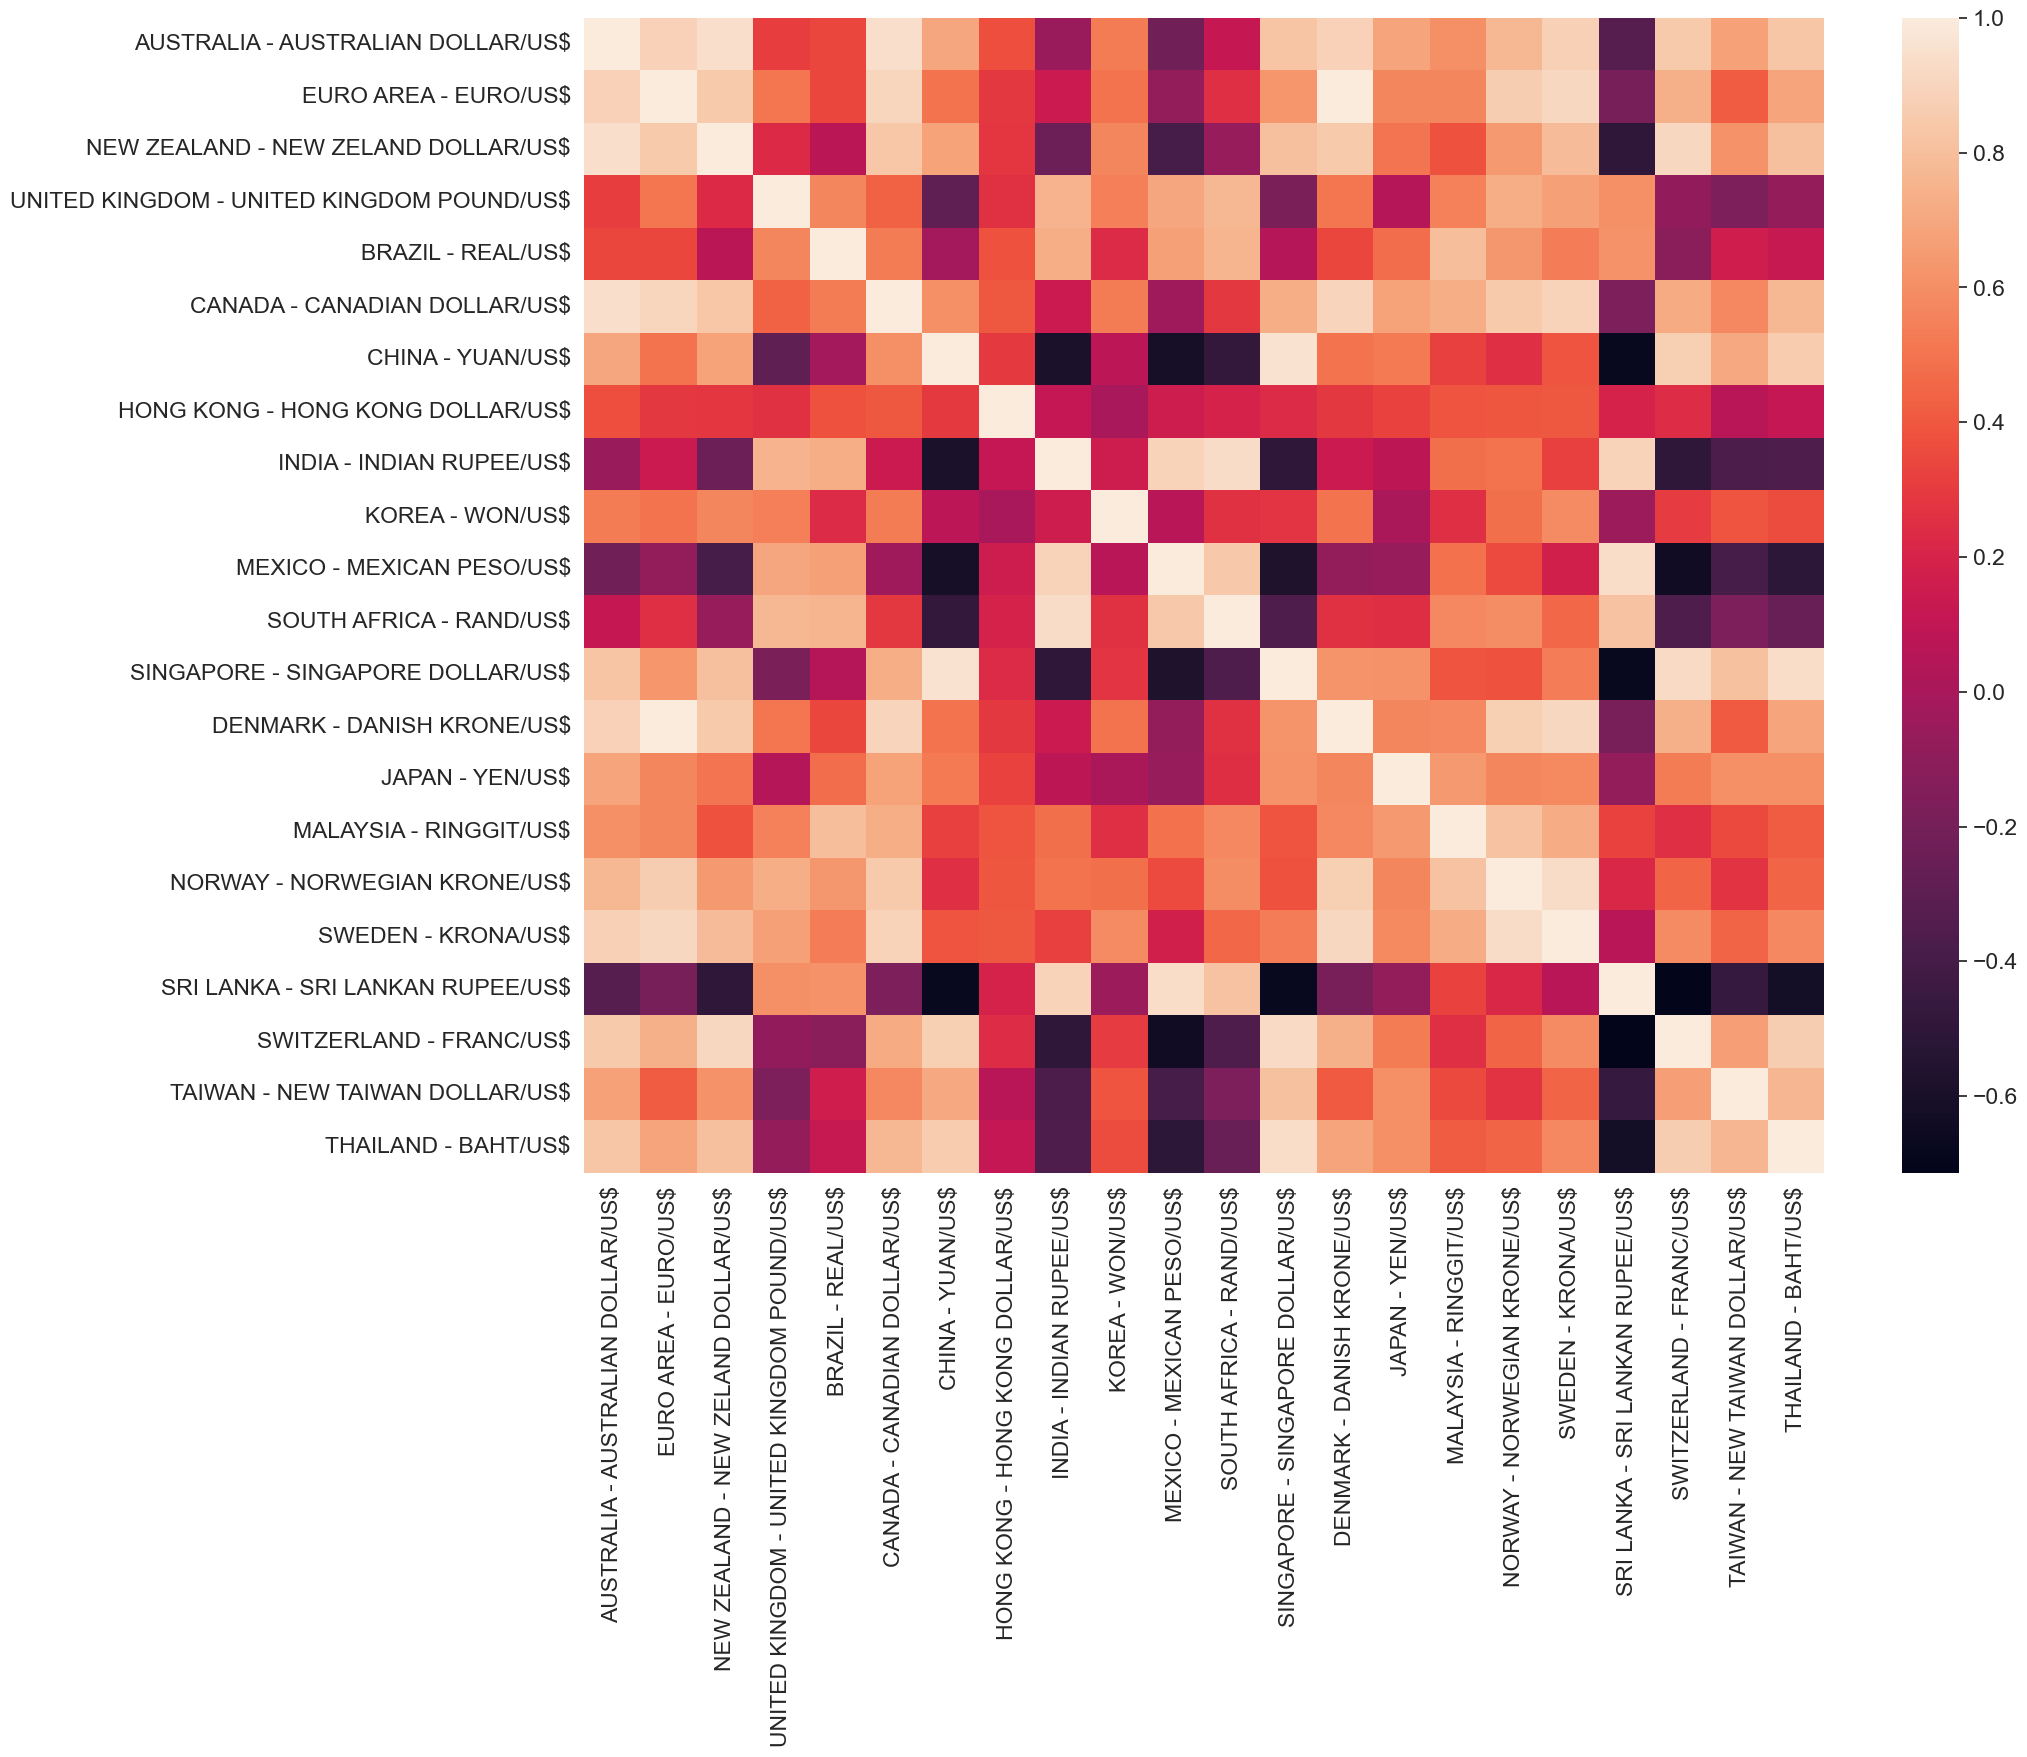

In [8]:
# 1. Kорреляция
rates_corr = rates.corr(numeric_only=True)
sns.set(font_scale=1.5);
plt.subplots(figsize=(20,15))
hm=sns.heatmap(rates_corr);

1. Связаны ли валюты между собой? (чтобы более точно предсказать рынок) 

    По карте корреляции можно заменить, что большинство валют связаны друг с другом. Если взять Euro, она имеет наиболее высокую корреляция с Danish Krone, Australian Dollar, New Zealand Dollar, Canadian Dollar, Norwegian Krone, Krona, Franc и Baht.

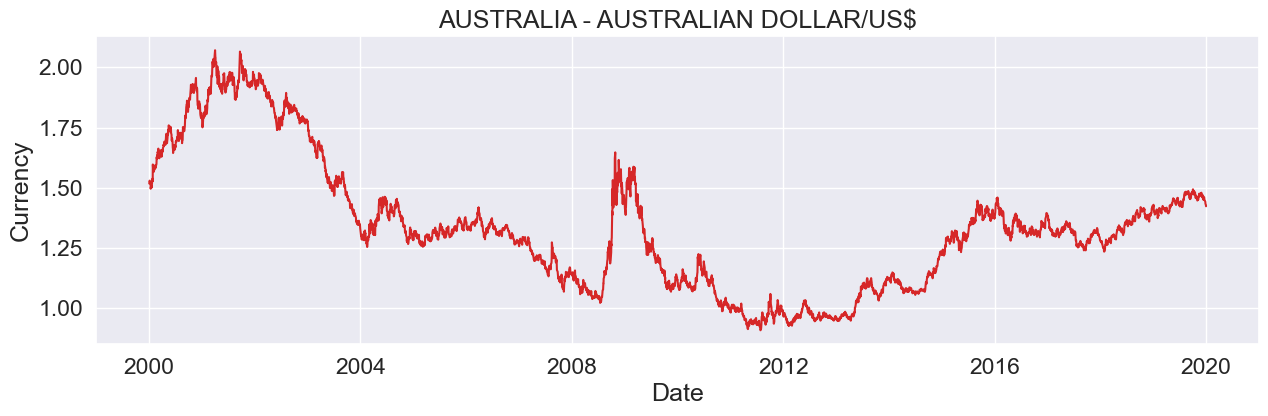

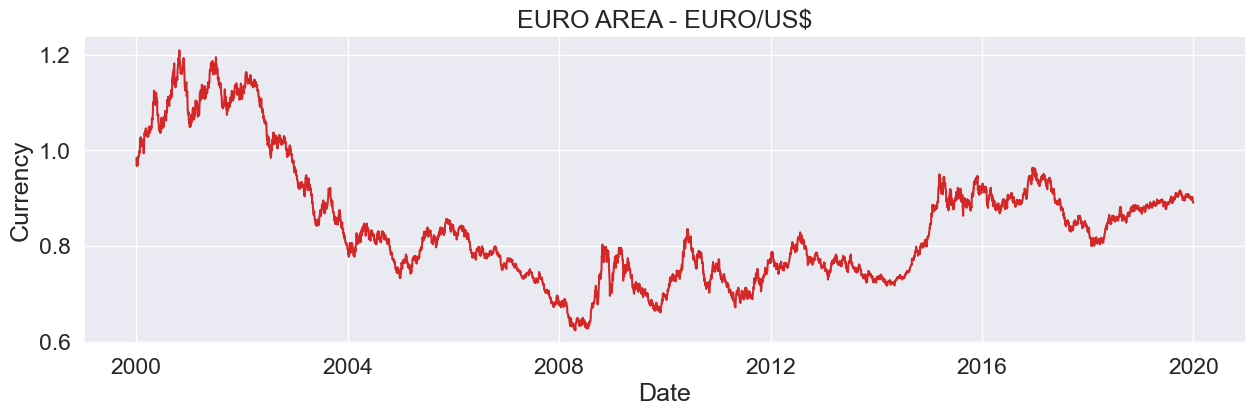

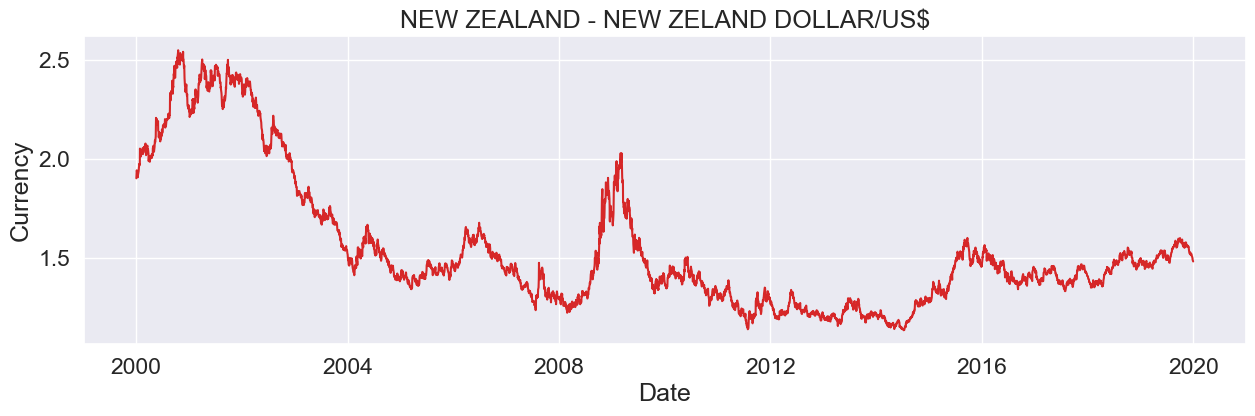

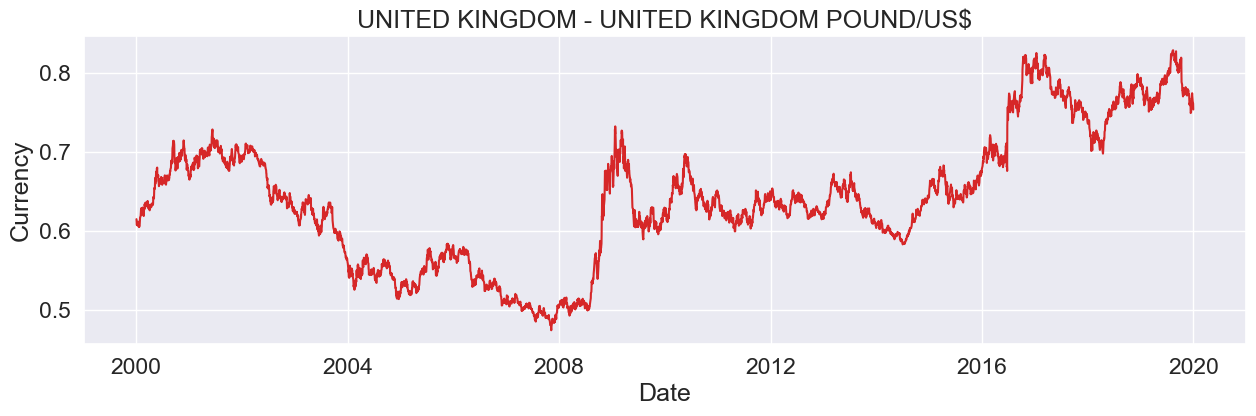

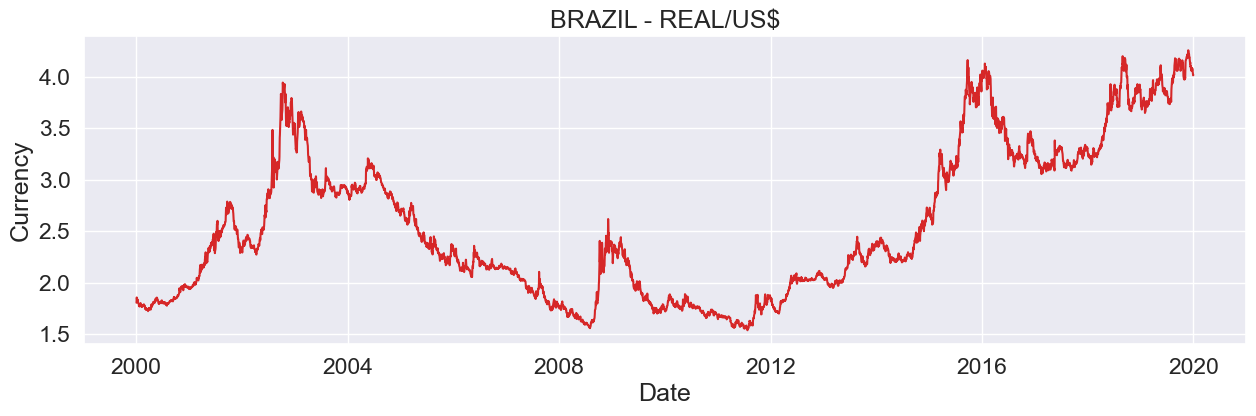

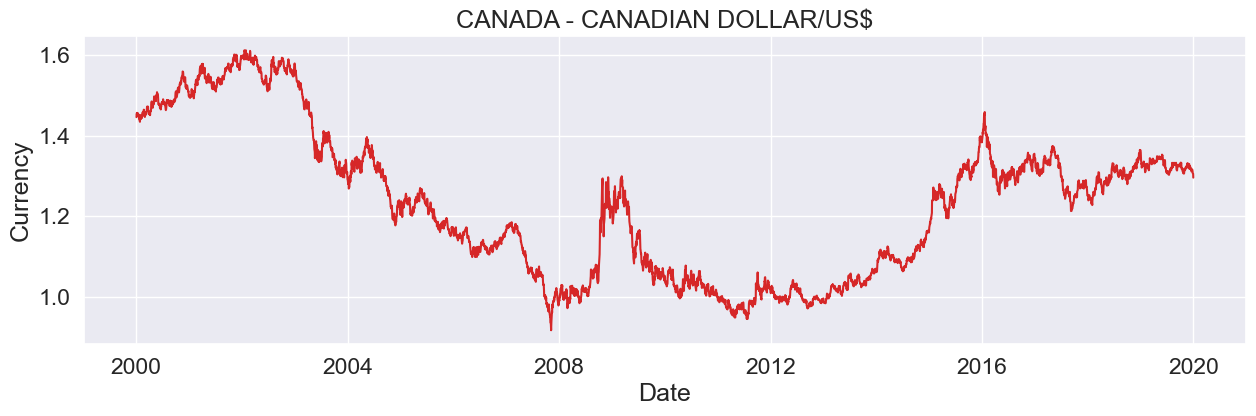

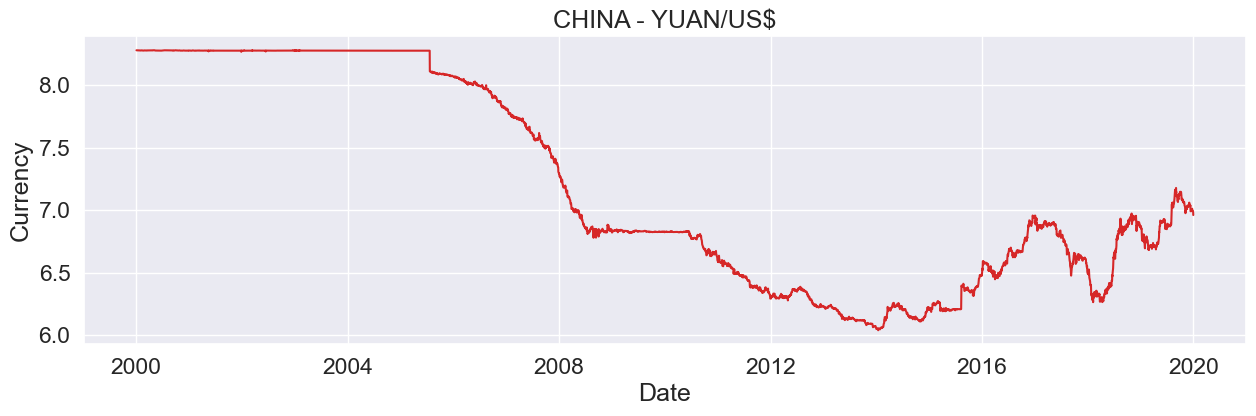

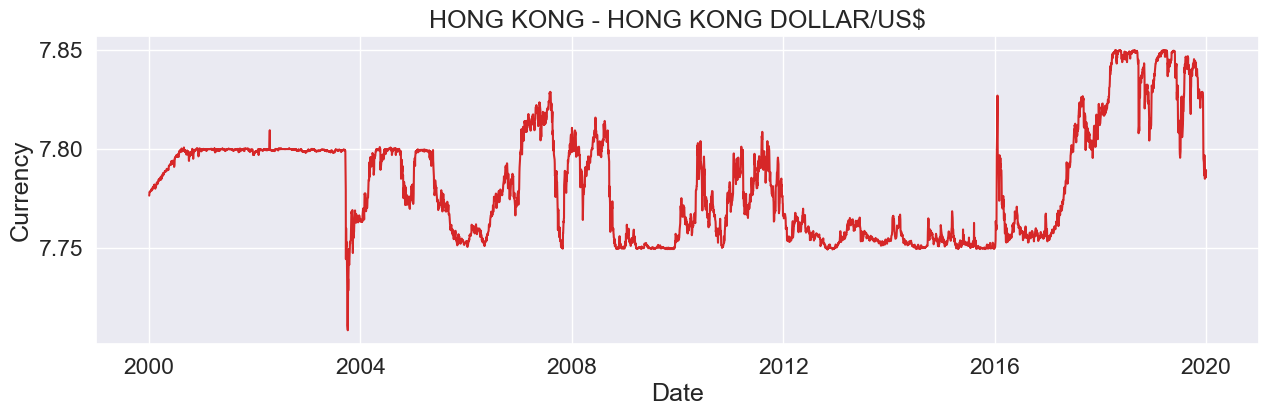

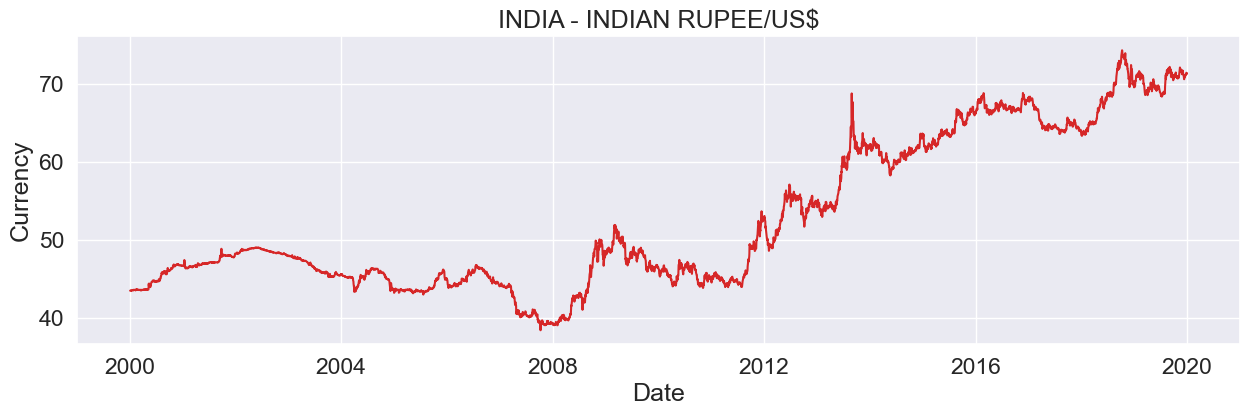

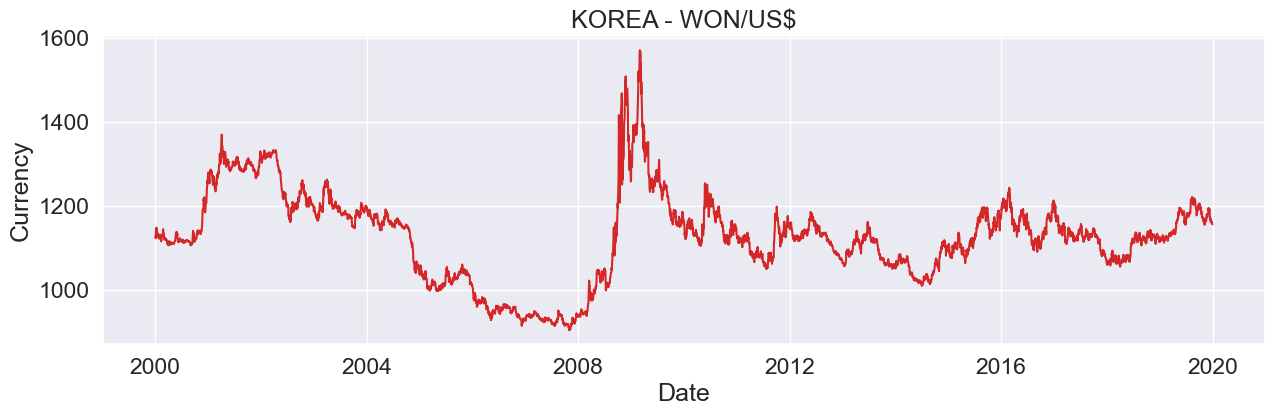

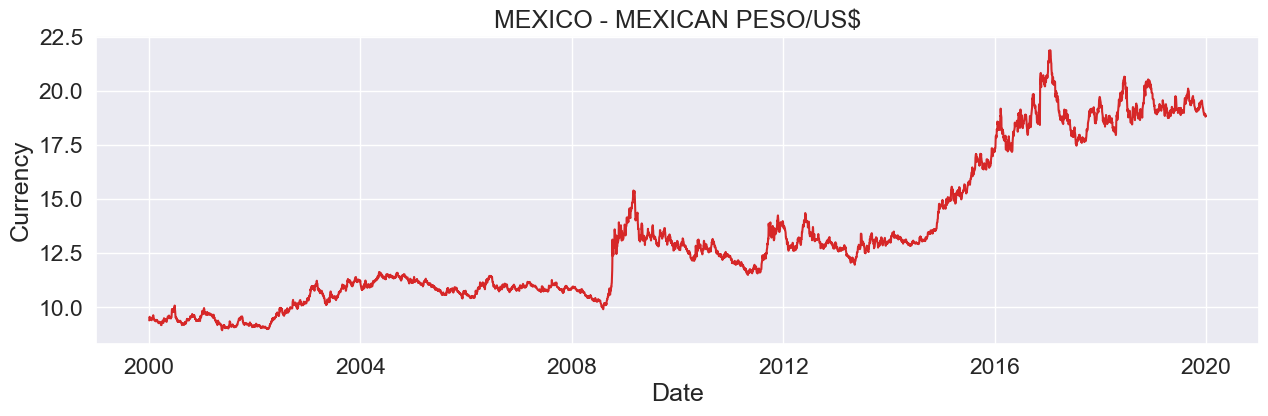

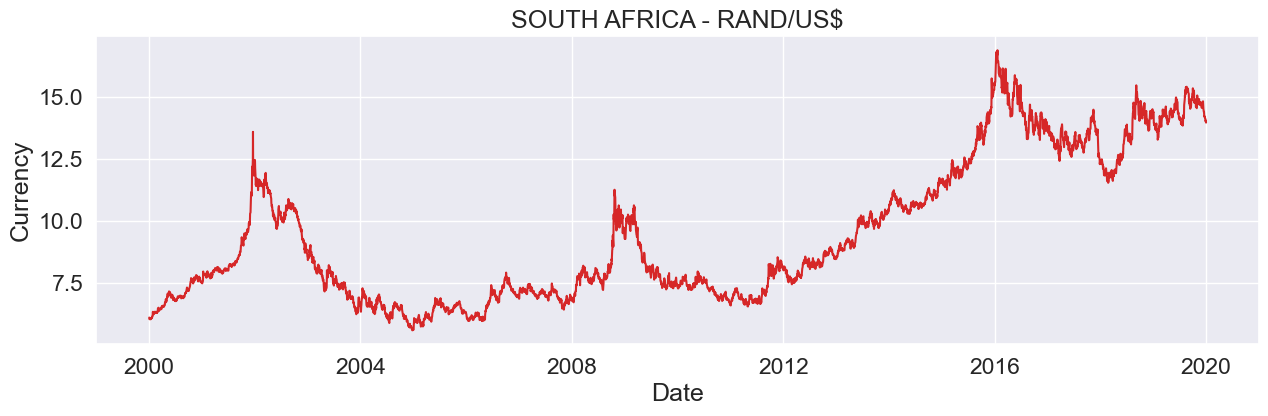

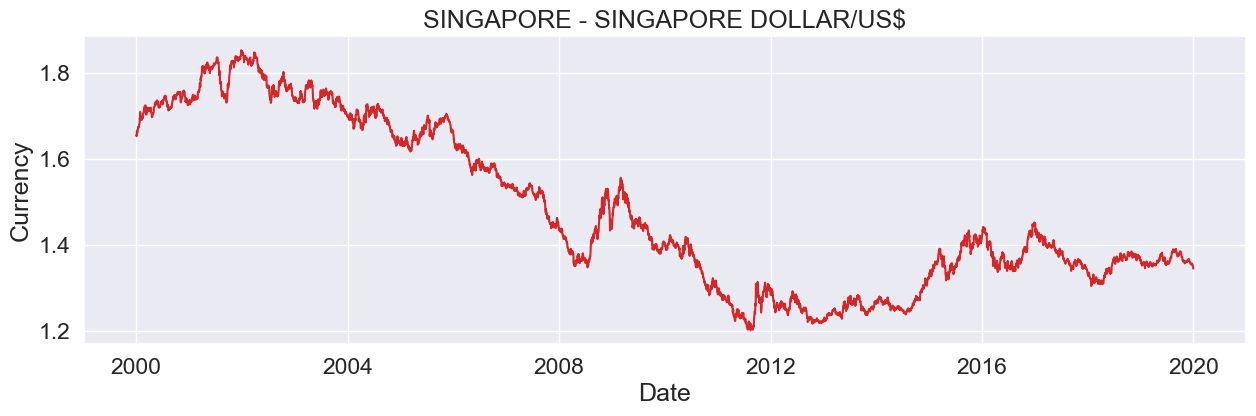

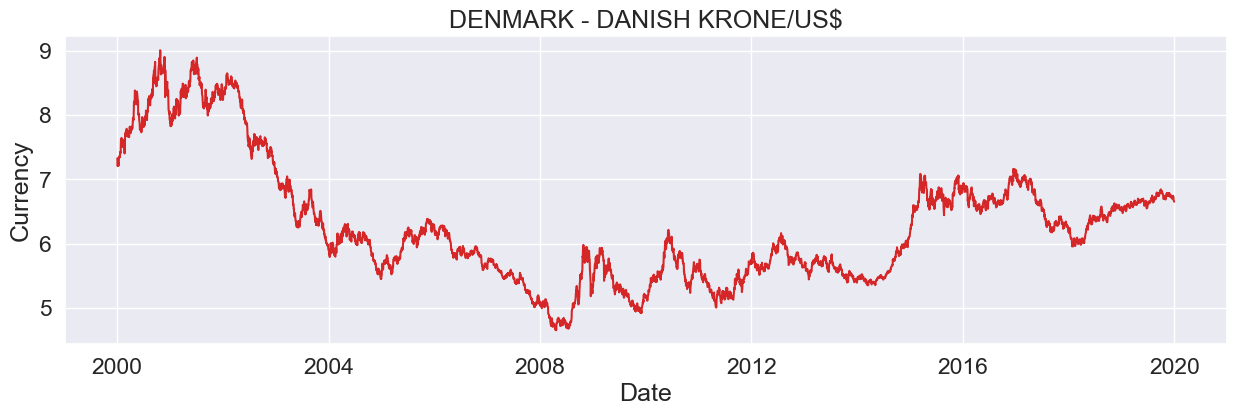

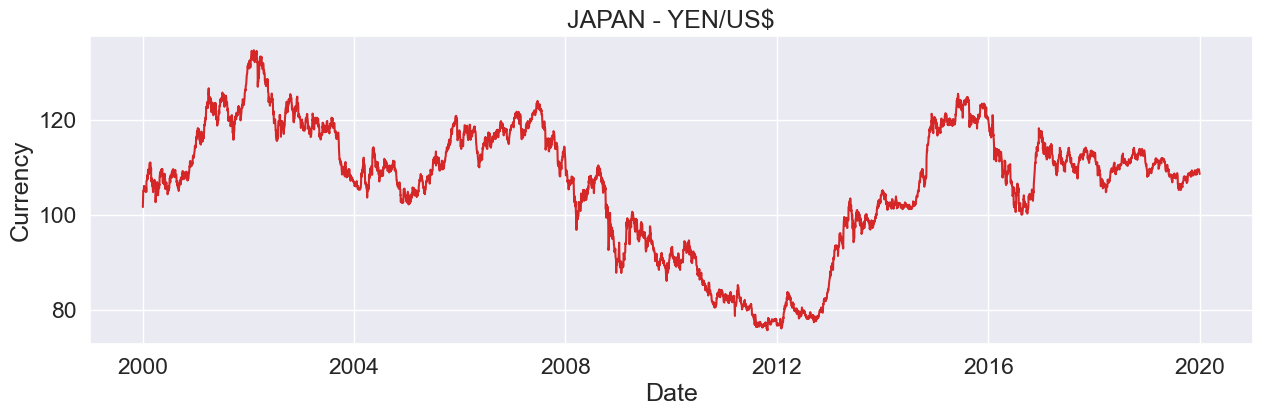

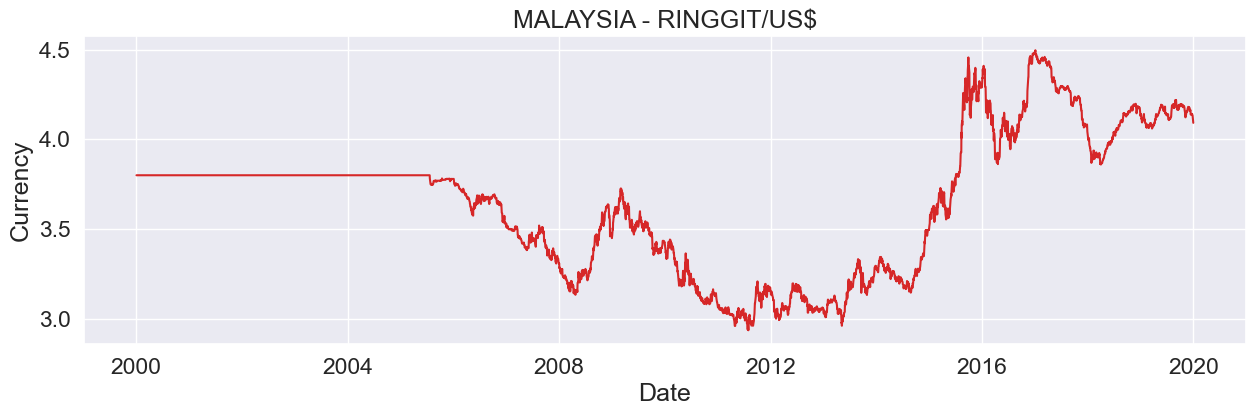

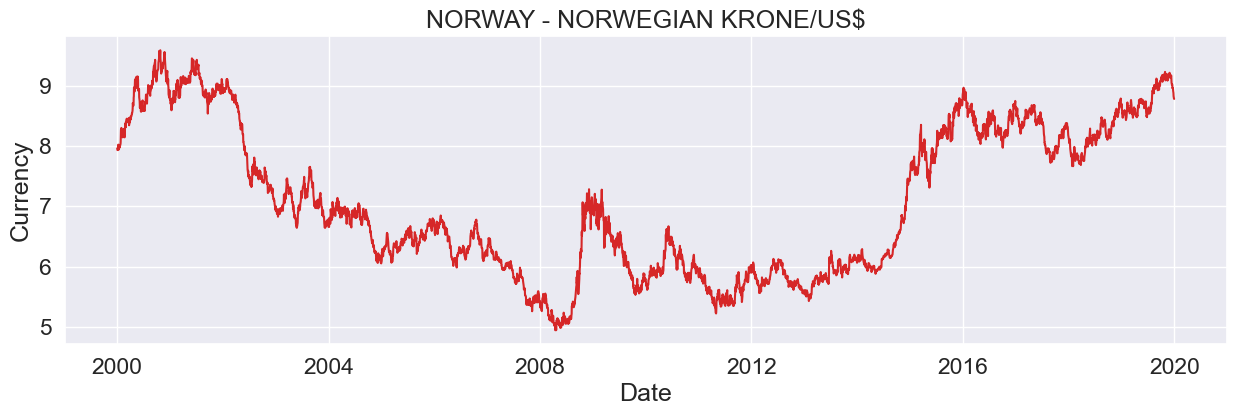

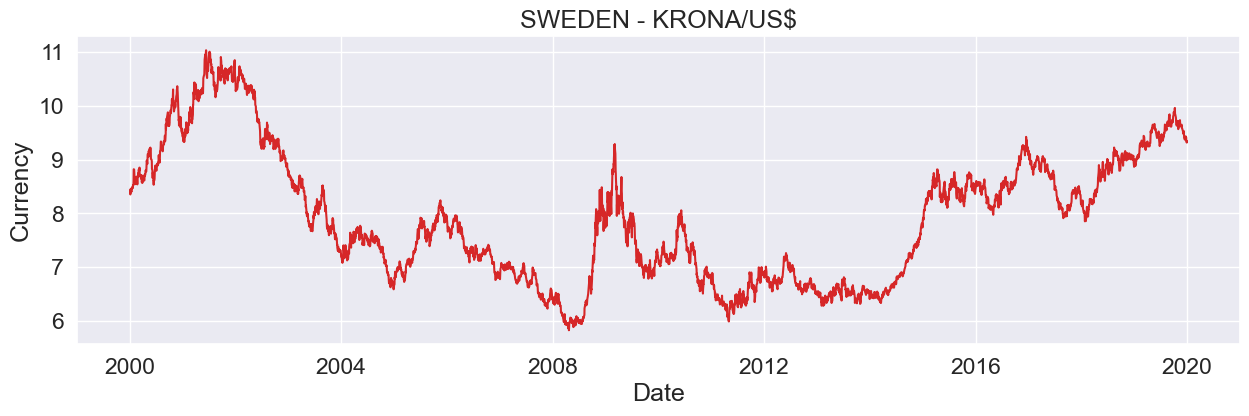

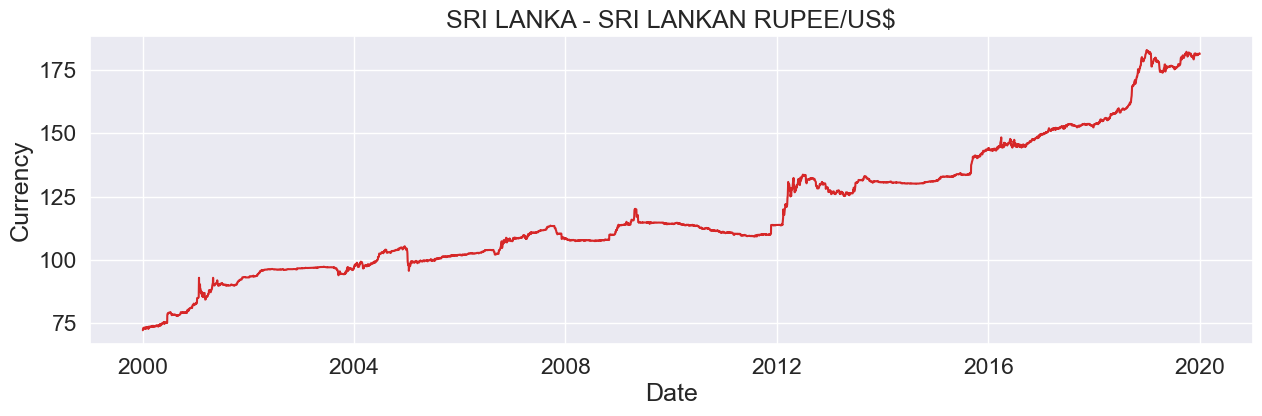

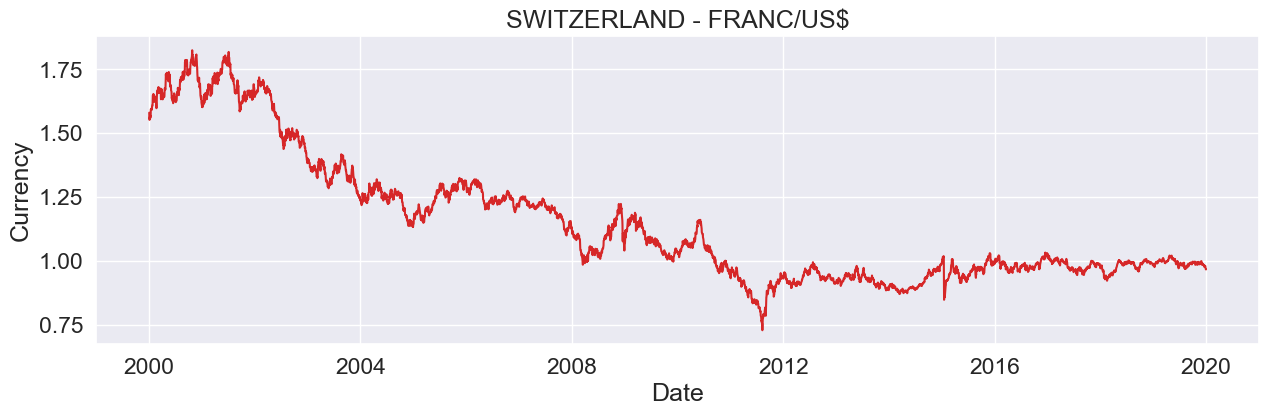

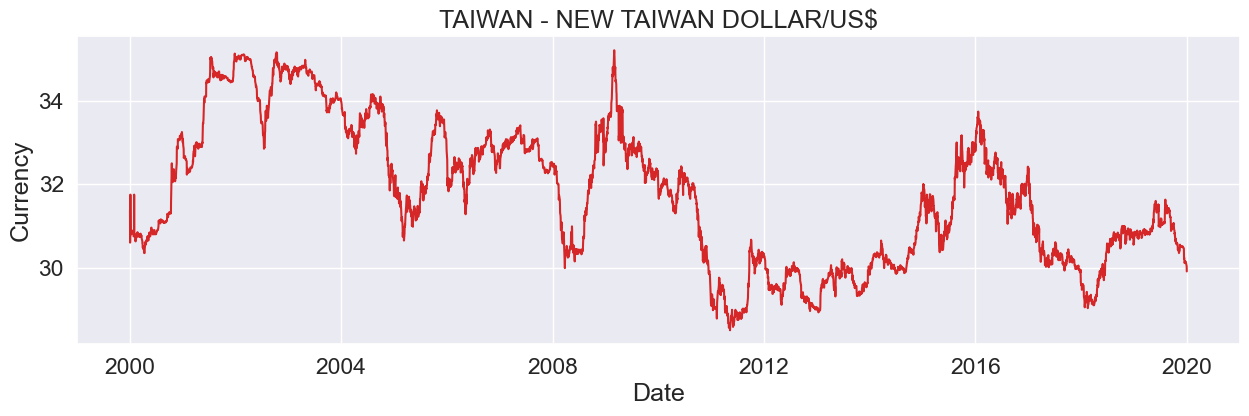

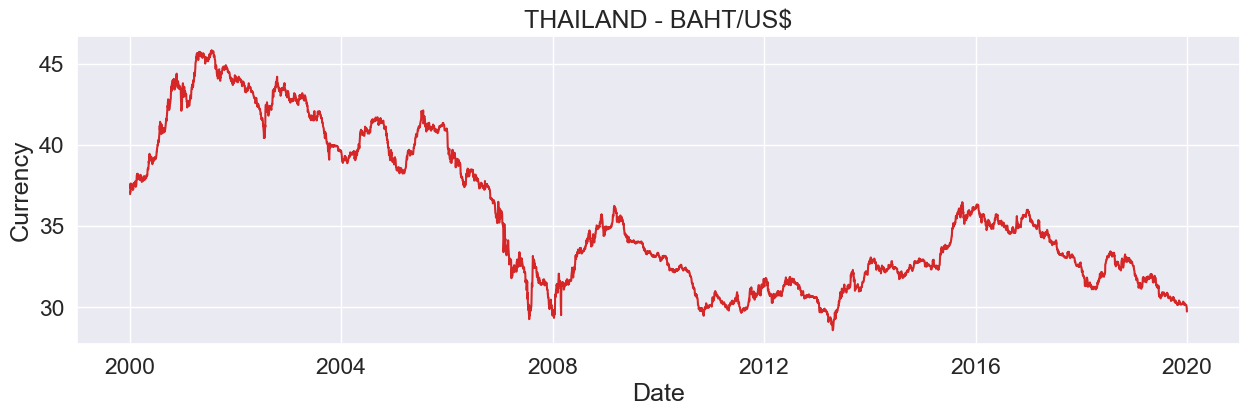

In [9]:
# 2. Тенденция 
def trend(df, x, y, title="", xlabel='Date', ylabel='Currency', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
for i in rates.columns[2:]:
    trend(rates, x=rates['Time Serie'], y=rates[i], title=i)

2. Какую тенденцию они имеют? (стоит ли покупать / продать)

    - По графику тенденции можно предположить, что Euro, Danish Krone, Australian Dollar, New Zealand Dollar, Canadian Dollar, Norwegian Krone, Krona, Franc и Baht идут на снижение.
    - Euro, Danish Krone, Australian Dollar и Canadian Dollar находятся на своих средних стоимостях. Так как мы предполагаем дальнейшее снижение их стоимости, я предлагаю выждать их снижение, и потом только покупать USD.
    - New Zealand Dollar, Franc и Baht находятся на низких стоимостях, предлагаю купить на них USD.
    - Norwegian Krone и Krona находятся на пике своей стоимости, и так как ожидается их снижение, предлагая обменять USD на Norwegian Krone и Krona.

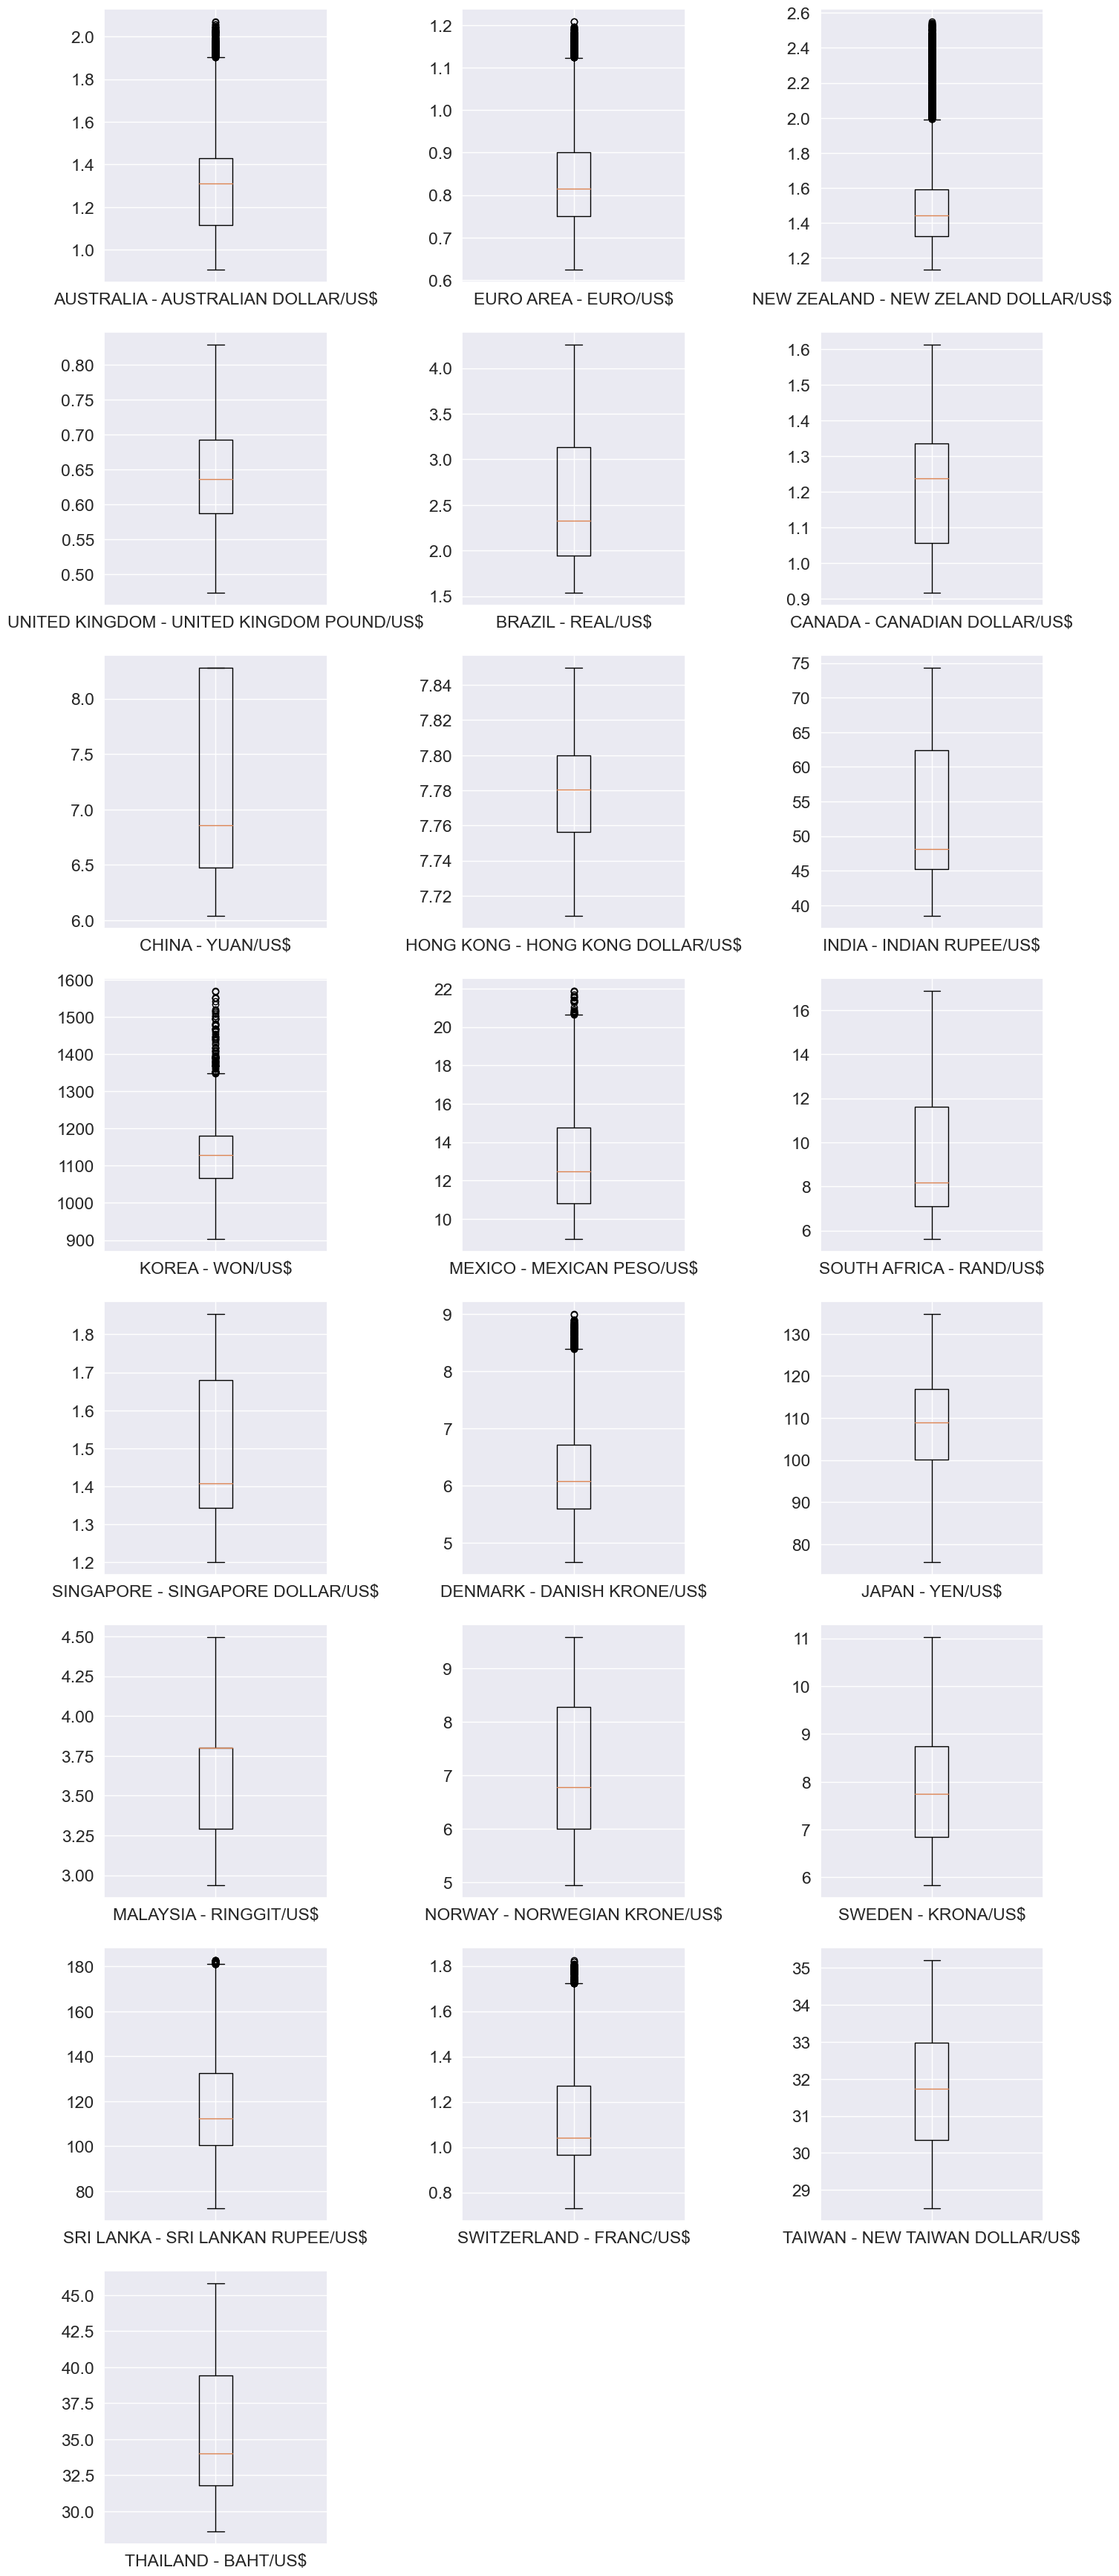

In [10]:
# 3-4. Визуализация средних значении
axs=[]
fig=plt.figure(figsize=(15,35))
for i in range(1,23):
    axs.append(fig.add_subplot(8,3,i))
for ax, column in zip(axs, rates.columns[2:]):
    ax.boxplot(rates[column]);
    ax.set_xticklabels([column]);
fig.tight_layout()

3. Какая максимальна и минимальная сумма? (на что можно расчитывать)
4. Какое среднее значение каждой валюты? (что более вероятно)

    - Australian Dollar: min - max = 0.9 - 1.9, более вероятное колебание в районе 1.1 - 1.4. Максимальная прибыль 1 Australian Dollar, более вероятная 0.3 Australian Dollar.
    - Euro: min - max = 0.6 - 1.1, более вероятное колебание в районе 0.75 - 0.9. Максимальная прибыль 0.5 Euro, более вероятная 0.15 Euro.
    - New Zealand Dollar: min - max = 1.1 - 2.0, более вероятное колебание в районе 1.30 - 1.55. Максимальная прибыль 0.9 New Zealand Dollar, более вероятная 2.5 New Zealand Dollar.
    - Canadian Dollar: min - max = 0.95 - 1.6, более вероятное колебание в районе 1.05 - 1.35. Максимальная прибыль 0.65 Canadian Dollar, более вероятная 0.3 Canadian Dollar.
    - Danish Krone: min - max = 4.8 - 8.4, более вероятное колебание в районе 5.6 - 6.8. Максимальная прибыль 3.6 Danish Krone, более вероятная 1.2 Danish Krone.
    - Norwegian Krone: min - max = 5.0 - 9.5, более вероятное колебание в районе 6.0 - 8.2. Максимальная прибыль 4.5 Norwegian Krone, более вероятная 2.2 Norwegian Krone.
    - Krona: min - max = 5.9 - 11.0, более вероятное колебание в районе 6.9 - 8.8. Максимальная прибыль 5.1 Krona, более вероятная 1.9 Krona.
    - Franc: min - max = 0.7 - 1.7, более вероятное колебание в районе 1.0 - 1.25. Максимальная прибыль 1 Franc, более вероятная 0.25 Franc.
    - Baht: min - max = 34 - 46, более вероятное колебание в районе 32 - 40. Максимальная прибыль 12 Baht, более вероятная 8 Baht.

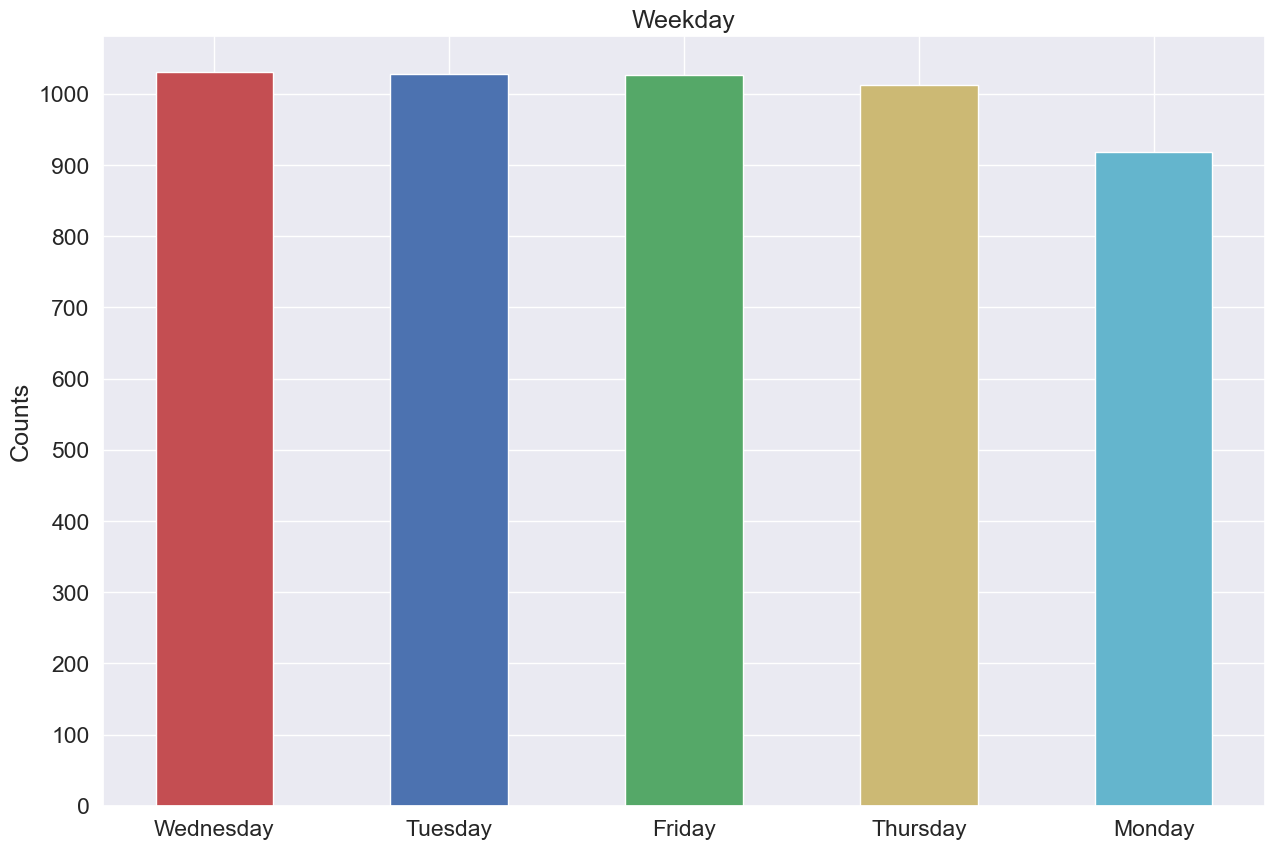

In [11]:
# 5. Визуальная информация по дням недели
plt.subplots(figsize=(15,10))
weekdays = rates.iloc[:,0].value_counts()
plt.bar(x=weekdays.keys(), height=weekdays.values, width=0.5, color=['r','b','g','y','c']);
plt.title('Weekday');
plt.ylabel('Counts');
plt.yticks(np.arange(0, 1100, 100));

5. Связана ли информация о валютах к определенному дню недели? (какой день нужно мониторить более пристально)

    Валютный рынок не работает в выходные дни.